In [2]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn. neighbors import KNeighborsClassifier

from ipywidgets import interactive
from collections import defaultdict

import hdbscan
import folium
import re

cols = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4',
        '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', 
        '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', 
        '#000075', '#808080']*10
sns.set(style="white")

In [3]:
df = pd.read_csv('twitter_posts.csv')
df.head()

,Date,Username,longitude,latitude,city,country
0,2023-03-18 16:28:04+00:00,RokebyM,67.997691,6.622513,India',India
1,2023-03-18 11:20:07+00:00,watwijm,94.944302,26.649359,Arunachal Pradesh,India
2,2023-03-18 11:05:10+00:00,travelwitharyan,72.206516,27.698326,Bikaner,India
3,2023-03-18 11:03:32+00:00,travelwitharyan,72.206516,27.698326,Bikaner,India
4,2023-03-18 08:44:42+00:00,NSivapriyan2141,77.312066,8.230492,Padmanabhapuram,India


### Dropping NaN and Duplicates

In [5]:
print(f'Before dropping values\t:\tdf.shape = {df.shape}')
df.dropna(inplace=True)
df.drop_duplicates(subset = ['latitude','longitude'], keep='first', inplace=True)
print(f'After dropping values\t:\tdf.shape = {df.shape}')

Before dropping values	:	df.shape = (1797, 6)
After dropping values	:	df.shape = (604, 6)


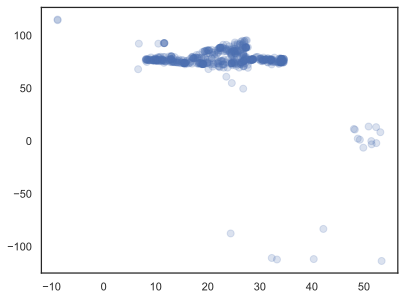

In [13]:
X = np.array(df[['latitude', 'longitude']], dtype='float64')
plt.scatter(X[:,0], X[:,1], alpha=0.2, s=50)

In [15]:
m = folium.Map(location=[df.latitude.mean(), df.longitude.mean()], zoom_start=9, tiles='OpenStreet Map')

for _, row in df.iterrows():
    folium.CircleMarker(location=[row.latitude, row.longitude], radius = 5, popup=row['city'], color = '#1787FE',fill=True, fill_colour='#1787FE').add_to(m)
    
m

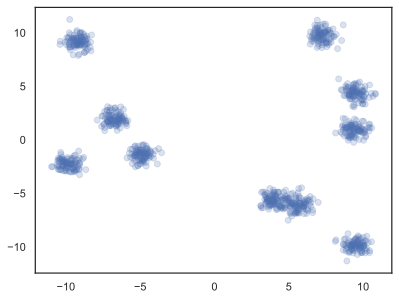

In [17]:
X_blobs,_ = make_blobs(n_samples=1000,centers=10, n_features=2, cluster_std=0.5, random_state=4)
plt.scatter(X_blobs[:,0], X_blobs[:,1], alpha = 0.2)

FileNotFoundError: [Errno 2] No such file or directory: 'samples_cluster.npy'